In [109]:
from sklearn import datasets
import pandas as pd 

Data = datasets.load_digits()
print(dir(Data))
File = pd.DataFrame(Data.data,Data.target)
File['Target'] = Data.target
File

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
0,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
8,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
9,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [110]:
import sklearn.model_selection
X = File.drop(['Target'],axis='columns')
Y = File['Target']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.3,random_state=2)


In [111]:
import sklearn.neighbors

Model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)
Model.fit(X_train,y_train)
print('\nThe Accurecy of Train model is :{0}'.format(Model.score(X_train,y_train)))
print('\nThe Accurecy of Train model is :{0}'.format(Model.score(X_test,y_test)))


The Accurecy of Train model is :1.0

The Accurecy of Train model is :0.9833333333333333


In [117]:
Model.predict([[0,9,2,3,4,5,6,0,0,9,9,9,2,6,4,5,6,8,9,9,4,9,2,3,4,5,6,7,6,9,0,9,2,3,4,5,6,0,0,9,0,9,2,3,4,5,6,0,0,9,0,9,2,3,4,5,6,0,0,9,3,5,2,4]])

array([3])

In [118]:
import sklearn.metrics
Predict = Model.predict(X_test)
CM =sklearn.metrics.confusion_matrix(y_test,Predict)
CM

array([[54,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 62,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 50,  0,  0,  1,  1,  1],
       [ 0,  0,  0,  0,  0, 58,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 55,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 45,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  1,  1, 41]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Visulization of Digits Data Set')

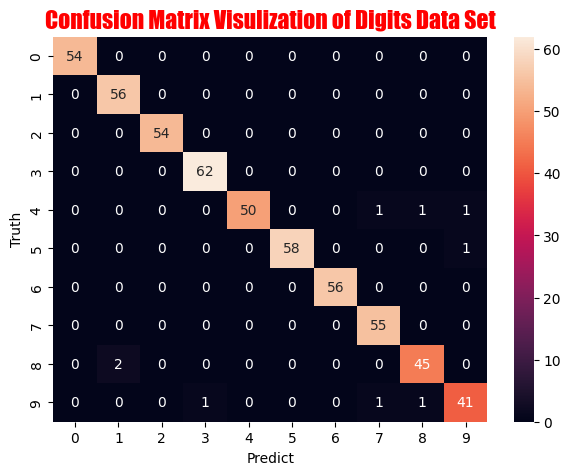

In [119]:
import seaborn
import matplotlib.pyplot
matplotlib.pyplot.figure(figsize=(7,5))
seaborn.heatmap(CM,annot=True)
matplotlib.pyplot.xlabel('Predict')
matplotlib.pyplot.ylabel('Truth')
matplotlib.pyplot.title('Confusion Matrix Visulization of Digits Data Set',family='impact',color='red',size=17)

In [120]:
print(sklearn.metrics.classification_report(Predict,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      0.97      0.98        58
           2       1.00      1.00      1.00        54
           3       1.00      0.98      0.99        63
           4       0.94      1.00      0.97        50
           5       0.98      1.00      0.99        58
           6       1.00      1.00      1.00        56
           7       1.00      0.96      0.98        57
           8       0.96      0.96      0.96        47
           9       0.93      0.95      0.94        43

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

